## Simple Linear Regresson
> [**Data Link**](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

- Lotarea : 대지면적
- GrLivArea: 지상 생활권 면적 (sqft)
- SlaePrice: 집 값 (dollar)

In [5]:
options(warn=-1)

library(lmtest) ## bptest, dwtest
library(tidyverse)
library(janitor)
library("gridExtra")

library(corrplot)
library(ggplot2)
library(scales)
library(ggrepel)


## 데이터 불러오기

In [6]:
df <- read.csv('./house_price/train.csv')
head(df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [57]:
str(df)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


In [7]:
str(df[,c(1:10, 81)])

'data.frame':	1460 obs. of  11 variables:
 $ Id         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning   : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage: int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea    : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street     : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley      : chr  NA NA NA NA ...
 $ LotShape   : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour: chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities  : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ SalePrice  : int  208500 181500 223500 140000 250000 143000 307000 200000 129900 118000 ...


## Data fields
Here's a brief version of what you'll find in the data description file.

|Variable name|Description|
|-------------|-----------|
|**SalePrice** | the property's sale price in dollars. This is the target variable that you're trying to predict.|
|MSSubClass | The building class|
|MSZoning | The general zoning classification|
|LotFrontage:| Linear feet of street connected to property|
|LotArea| Lot size in square feet|
|Street:| Type of road access|
|Alley:| Type of alley access|
|LotShape:| General shape of property|
|LandContour:| Flatness of the property|
|Utilities:| Type of utilities available|
|LotConfig:| Lot configuration|
|LandSlope:| Slope of property|
|Neighborhood:| Physical locations within Ames city limits|
|Condition1:| Proximity to main road or railroad|
|Condition2:| Proximity to main road or railroad (if a second is present)|
|BldgType:| Type of dwelling|
|HouseStyle:| Style of dwelling|
|OverallQual:| Overall material and finish quality|
|OverallCond:| Overall condition rating|
|YearBuilt:| Original construction date|
|YearRemodAdd:| Remodel date|
|RoofStyle:| Type of roof|
|RoofMatl:| Roof material|
|Exterior1st:| Exterior covering on house|
|Exterior2nd:| Exterior covering on house (if more than one material)|
|MasVnrType:| Masonry veneer type|
|MasVnrArea:| Masonry veneer area in square feet|
|ExterQual:| Exterior material quality|
|ExterCond:| Present condition of the material on the exterior|
|Foundation:| Type of foundation|
|BsmtQual:| Height of the basement|
|BsmtCond:| General condition of the basement|
|BsmtExposure:| Walkout or garden level basement walls|
|BsmtFinType1:| Quality of basement finished area|
|BsmtFinSF1:| Type 1 finished square feet|
|BsmtFinType2:| Quality of second finished area (if present)|
|BsmtFinSF2:| Type 2 finished square feet|
|BsmtUnfSF:| Unfinished square feet of basement area|
|TotalBsmtSF:| Total square feet of basement area|
|Heating:| Type of heating|
|HeatingQC: |Heating quality and condition|
|CentralAir:| Central air conditioning|
|Electrical:| Electrical system|
|1stFlrSF:| First Floor square feet|
|2ndFlrSF:| Second floor square feet|
|LowQualFinSF:| Low quality finished square feet (all floors)|
|**GrLivArea**| Above grade (ground) living area square feet|
|BsmtFullBath:| Basement full bathrooms|
|BsmtHalfBath:| Basement half bathrooms|
|FullBath:| Full bathrooms above grade|
|HalfBath:| Half baths above grade|
|Bedroom:| Number of bedrooms above basement level|
|Kitchen:| Number of kitchens|
|KitchenQual:| Kitchen quality|
|TotRmsAbvGrd:| Total rooms above grade (does not include bathrooms)|
|Functional:| Home functionality rating|
|Fireplaces:| Number of fireplaces|
|FireplaceQu:| Fireplace quality|
|GarageType:| Garage location|
|GarageYrBlt:| Year garage was built|
|GarageFinish:| Interior finish of the garage|
|GarageCars:| Size of garage in car capacity|
|GarageArea:| Size of garage in square feet|
|GarageQual:| Garage quality|
|GarageCond:| Garage condition|
|PavedDrive:| Paved driveway|
|WoodDeckSF:| Wood deck area in square feet|
|OpenPorchSF:| Open porch area in square feet|
|EnclosedPorch:| Enclosed porch area in square feet|
|3SsnPorch:| Three season porch area in square feet|
|ScreenPorch:| Screen porch area in square feet|
|PoolArea:| Pool area in square feet|
|PoolQC:| Pool quality|
|Fence:| Fence quality|
|MiscFeature:| Miscellaneous feature not covered in other categories|
|MiscVal:| Value of miscellaneous feature|
|MoSold:| Month Sold|
|YrSold:| Year Sold|
|SaleType:| Type of sale|
|SaleCondition:| Condition of sale|

## 탐색

In [8]:
dim(df)

[1] 1460   81

In [9]:
is.na(df) %>% colSums()

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0           259             0 
       Street         Alley      LotShape   LandContour     Utilities 
            0          1369             0             0             0 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
            0             0             0             0             0 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
            0             0             0             0             0 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            0             0             0             0             0 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
            8             8             0             0             0 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
           37            37            38            37             0 
 BsmtFinType2    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating 
           38             0             0             0             0 
    HeatingQC    CentralAir    Electrical     X1stFlrSF     X2ndFlrSF 
            0             0             1             0             0 
 LowQualFinSF     GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath 
            0             0             0             0             0 
     HalfBath  BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd 
            0             0             0             0             0 
   Functional    Fireplaces   FireplaceQu    GarageType   GarageYrBlt 
            0             0           690            81            81 
 GarageFinish    GarageCars    GarageArea    GarageQual    GarageCond 
           81             0             0            81            81 
   PavedDrive    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        PoolQC         Fence   MiscFeature 
            0             0          1453          1179          1406 
      MiscVal        MoSold        YrSold      SaleType SaleCondition 
            0             0             0             0             0 
    SalePrice 
            0

In [14]:
numeric_vars <- which(sapply(df, is.numeric)) # index vector numeric variables
numeric_var_names <- names(numeric_vars) 
cat('There are', length(numeric_vars), 'numeric variables')

There are 38 numeric variables

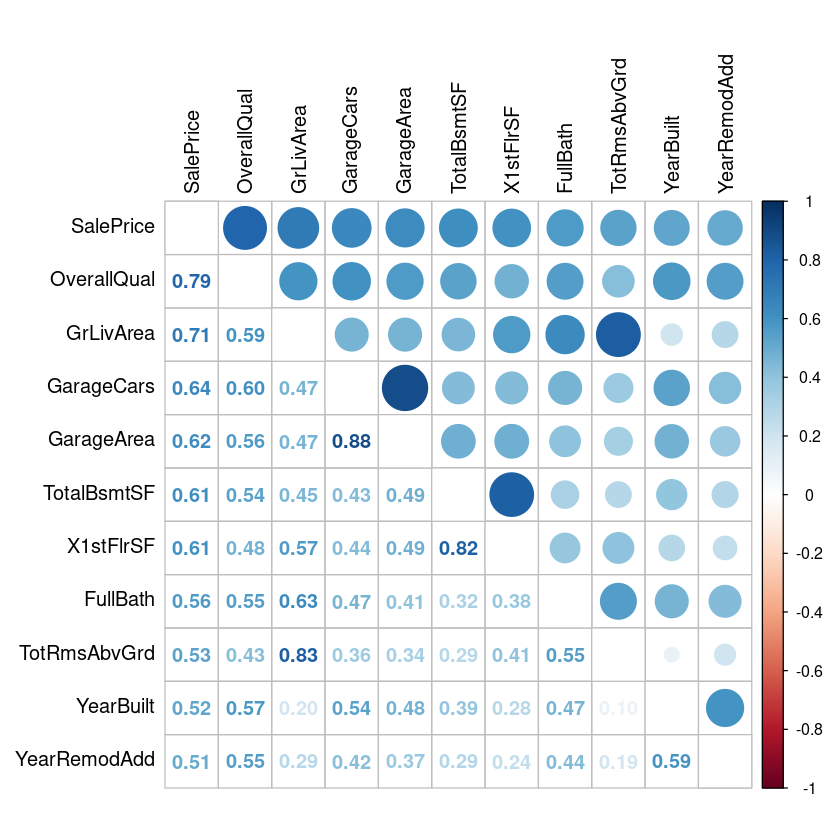

In [17]:
numeric_data <- df[, numeric_vars]
cor_numeric <- cor(numeric_data, use="pairwise.complete.obs") #correlations of all numeric variables

#sort on decreasing correlations with SalePrice
cor_sorted <- as.matrix(sort(cor_numeric[,'SalePrice'], decreasing = TRUE))

#select only high corelations
CorHigh <- names(which(apply(cor_sorted, 1, function(x) abs(x)>0.5))) 
cor_numVar <- cor_numVar[CorHigh, CorHigh]

corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")

`OverallQual`과 `GrLivArea`가 `SalesPrice`와 강한 양의 상관을 보인다.

다음은 SalePrice와 상관관계가 높은 변수들이다.
- OverallQual : 집의 전체적인 원자재 및 마감재에 대한 평가
- GrLivArea : 지상 생활권 면적(제곱 피트)
- GarageCars : 주차 공간
- GarageArea : 차고 면적(제곱 피트)
- TotalBsmtSf : 지하 공간 면적(제곱 피트)
- X1stFlrSF : 1층 면적(제곱 피트)
- FullBath : 풀옵션 화장실 개수
- TotRmsAbvGrd : 방의 개수 (화장실이 포함되지 않은 방.)
- YearBuilt : 건설 연도
- YearRemodAdd : 리모델링 연도(YearBuilt와 동일하면, 리모델링을 하지 않은 집.)

In [18]:
head(cor_sorted)

SalePrice,1.0000000
OverallQual,0.7909816
GrLivArea,0.7086245
GarageCars,0.6404092
GarageArea,0.6234314
TotalBsmtSF,0.6135806


### OverallQual

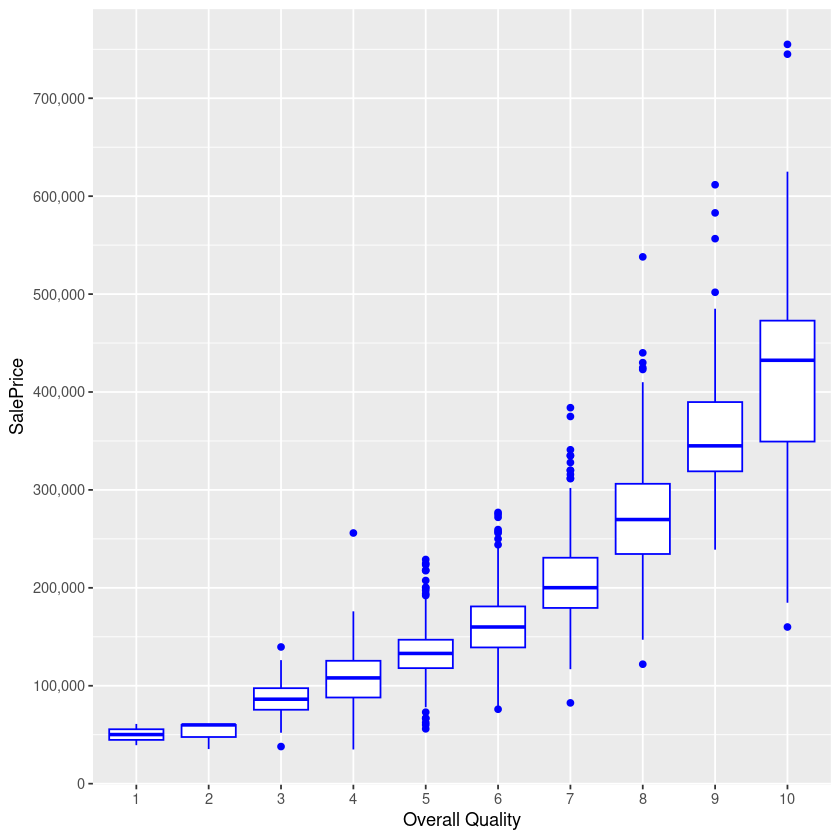

In [19]:
ggplot(data=df[!is.na(df$SalePrice),], aes(x=factor(OverallQual), y=SalePrice))+
        geom_boxplot(col='blue') + labs(x='Overall Quality') +
        scale_y_continuous(breaks= seq(0, 800000, by=100000), labels = comma)

원자재/마감재에 대한 Qaulity가 높을수록 집 값은 증가하는 경향이 나타남.

### GrLivArea

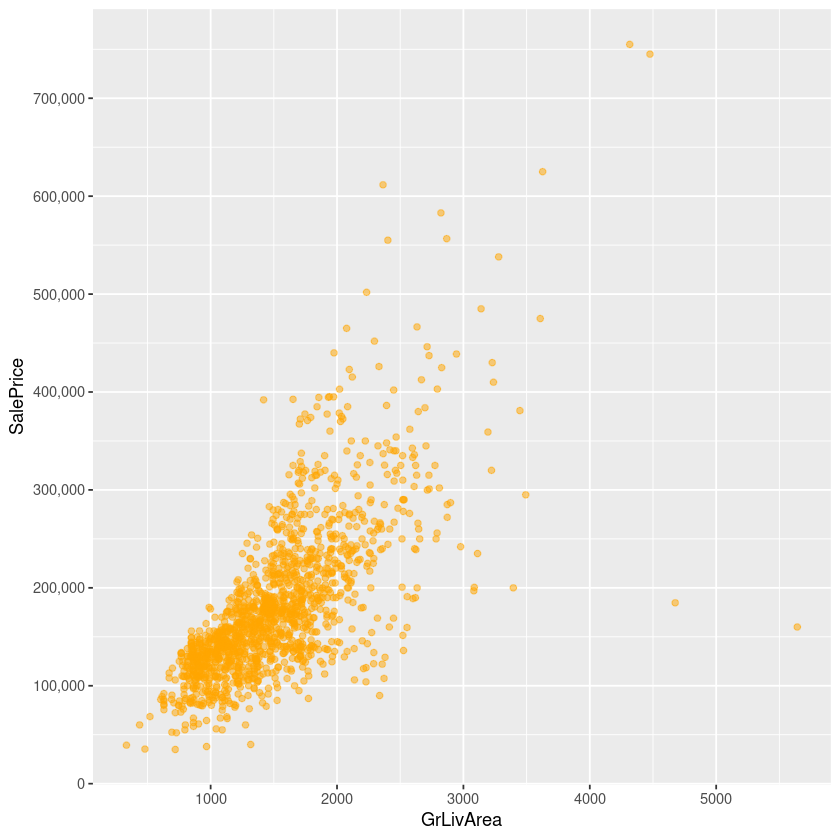

In [55]:
ggplot(data = df[!is.na(df$SalePrice), ], 
       aes(x = GrLivArea, y = SalePrice)) +
  geom_point(col='orange', alpha=0.5) +
  #geom_smooth(method = "lm", se = F, color = "steelblue") +
  scale_y_continuous(breaks = seq(0, 800000, by=100000), labels = comma)
  #geom_text_repel(aes(label = ifelse(df$GrLivArea[!is.na(df$SalePrice)] > 4500,
                                     # rownames(df), '')))

`geom_smooth()` using formula = 'y ~ x'


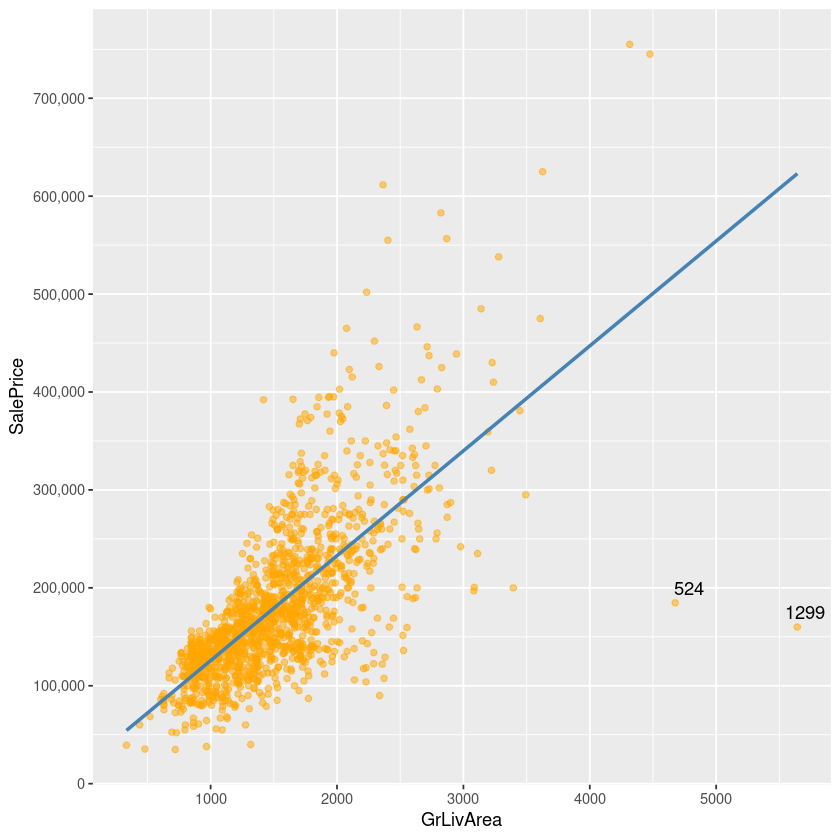

In [20]:
ggplot(data = df[!is.na(df$SalePrice), ], 
       aes(x = GrLivArea, y = SalePrice)) +
  geom_point(col='orange', alpha=0.5) +
  geom_smooth(method = "lm", se = F, color = "steelblue") +
  scale_y_continuous(breaks = seq(0, 800000, by=100000), labels = comma) +
  geom_text_repel(aes(label = ifelse(df$GrLivArea[!is.na(df$SalePrice)] > 4500,
                                     rownames(df), '')))

## 단순 선형회귀모형

In [21]:
df1 <- df[c('SalePrice','GrLivArea')]
head(df1)

,SalePrice,GrLivArea
,<int>,<int>
1,208500,1710
2,181500,1262
3,223500,1786
4,140000,1717
5,250000,2198
6,143000,1362


In [22]:
colSums(is.na(df1)) # 결측값 없음

SalePrice GrLivArea 
        0         0

In [23]:
summary(df[c('SalePrice', 'GrLivArea')])

   SalePrice        GrLivArea   
 Min.   : 34900   Min.   : 334  
 1st Qu.:129975   1st Qu.:1130  
 Median :163000   Median :1464  
 Mean   :180921   Mean   :1515  
 3rd Qu.:214000   3rd Qu.:1777  
 Max.   :755000   Max.   :5642  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


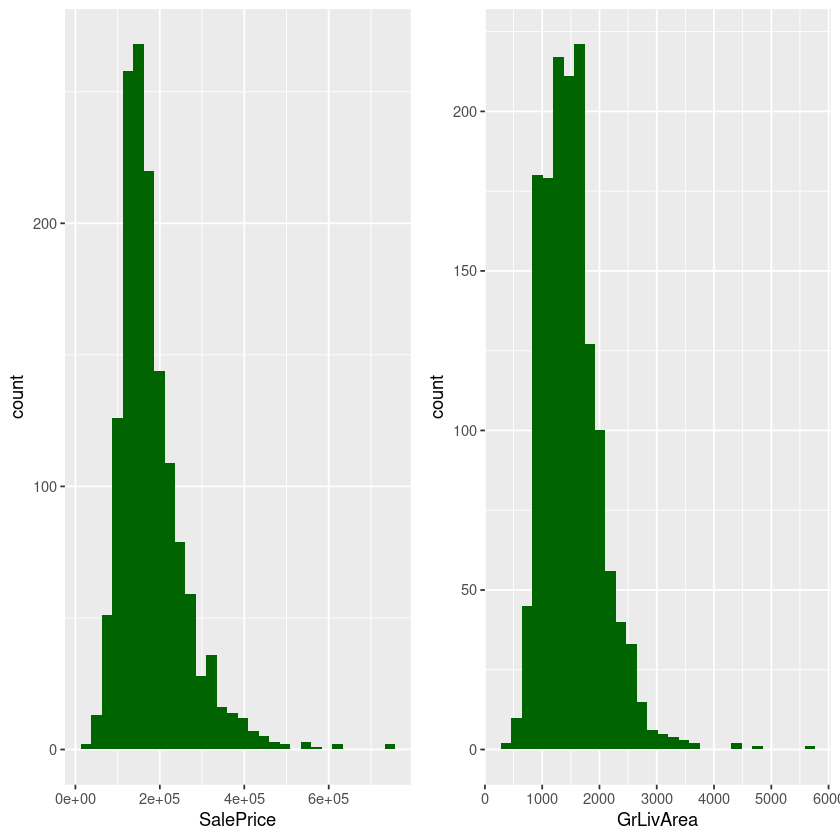

In [56]:
p1 <- ggplot(data=df, aes(x=SalePrice)) +
        geom_histogram(fill='darkgreen')
        # scale_x_continuous(breaks= seq(0, 800000, by=100000), labels = comma)
p2 <- ggplot(data=df, aes(x=GrLivArea)) +
        geom_histogram(fill='darkgreen')

grid.arrange(p1, p2, ncol=2)

- 오른쪽으로 skewed 되어 있음. (후에 변수변환 고려.)

### 적합1

$$\widehat{\text{SalePrice}} = \text{GrLivArea}\times 107.
1 + 18569 $$

In [25]:
model1 <- lm(SalePrice ~ GrLivArea, df1)
model1


Call:
lm(formula = SalePrice ~ GrLivArea, data = df1)

Coefficients:
(Intercept)    GrLivArea  
    18569.0        107.1  


In [26]:
summary(model1)


Call:
lm(formula = SalePrice ~ GrLivArea, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-462999  -29800   -1124   21957  339832 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18569.026   4480.755   4.144 3.61e-05 ***
GrLivArea     107.130      2.794  38.348  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56070 on 1458 degrees of freedom
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.5018 
F-statistic:  1471 on 1 and 1458 DF,  p-value: < 2.2e-16


#### 회귀모형의 유의성 검정

> $H_0 : \beta_1 = 0 \text{ vs. } \beta_1 \neq 0$

In [27]:
anova(model1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GrLivArea,1,4.623740e+12,4.62374e+12,1470.585,4.518034e-223
Residuals,1458,4.584171e+12,3.14415e+09,NA,NA


In [28]:
cat('기각치 F(1,1458;0.05): ', qf(0.95, 1, 48), '\n') ## F(0.05)
cat('F0: ' , summary(model1)$fstatistic[1])

기각치 F(1,1458;0.05):  4.042652 
F0:  1470.585

$F_0 > F(1, 1458 ;0.05)$ 이므로 회귀모형은 유의하지 않다는 귀무가설을 기각할 수 있다. 따라서 적합된 회귀모형은 유의하다고 판단한다.

#### 회귀계수의 유의성 검정

In [35]:
summary(model1)


Call:
lm(formula = SalePrice ~ GrLivArea, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-462999  -29800   -1124   21957  339832 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18569.026   4480.755   4.144 3.61e-05 ***
GrLivArea     107.130      2.794  38.348  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56070 on 1458 degrees of freedom
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.5018 
F-statistic:  1471 on 1 and 1458 DF,  p-value: < 2.2e-16


In [29]:
summary(model1)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),18569.0259,4480.754549,4.144174,3.606554e-05
GrLivArea,107.1304,2.793621,38.348207,4.518034e-223


In [47]:
qt(0.975, 1458)
qt(0.025, 1458)

[1] 1.961592

[1] -1.961592

- 유의수준 $5\%$ 기각역 : $|t| \geq 1.96$
- 따라서 유의수준 $5\%$하에서 회귀계수가 유의하지 않다는 귀무가설을 기각할 수 있다.

#### 회귀계수의 신뢰구간

In [30]:
confint(model1, level = 0.95)

,2.5 %,97.5 %
(Intercept),9779.6119,27358.4399
GrLivArea,101.6504,112.6103


#### 평균반응 추정

> $1\tt{sqft} \to 0.028$평

In [31]:
new_dt <- data.frame(GrLivArea = 1500) ## 42.15평 

In [32]:
predict(model1,
        newdata = new_dt,
        interval = c("confidence"), ## 구간추정, confidence option (평균반응)
        level = 0.95) ## 평균반응

,fit,lwr,upr
1,179264.6,176384.7,182144.4


- 실거주면적이 $1500$sqft 일 때 집값이 평균적으로 $179264.6$ 달러로 추정된다.
- 42평에 한화로 약 2억 3521만원

#### 개별 $y$ 추정

In [33]:
predict(model1,
        newdata = new_dt,
        interval = c("prediction"),  ## prediction option (개별 y)
        level = 0.95) ## 개별 y

,fit,lwr,upr
1,179264.6,69235.04,289294.1


평균반응과 개별 $y$ 추정 결과 점 추정값은 $179264.6$ 으로 동일한데 개별 $y$ 추정했을 경우 신뢰구간의 폭이 더 넓어진다. (불확실성 증가)

#### 신뢰대

In [34]:
dt_pred <- data.frame(
  GrLivArea = c(1:dim(df1)[1]),
  predict(model1,
          newdata = data.frame(GrLivArea=c(1:dim(df1)[1])),
          interval='confidence', level = 0.95), ## 평균반응
  predict(model1,
          newdata=data.frame(GrLivArea=c(1:dim(df1)[1])),
          interval='prediction',level = 0.95)[,-1]) ## 개별 y

names(dt_pred)[5:6] <- c('plwr', 'pupr')
head(dt_pred)

,GrLivArea,fit,lwr,upr,plwr,pupr
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,18676.16,9891.92,27460.39,-91665.88,129018.2
2,2,18783.29,10004.23,27562.35,-91558.34,129124.9
3,3,18890.42,10116.53,27664.30,-91450.79,129231.6
4,4,18997.55,10228.84,27766.25,-91343.25,129338.3
5,5,19104.68,10341.15,27868.21,-91235.71,129445.1
6,6,19211.81,10453.45,27970.16,-91128.17,129551.8


In [283]:
barx <- mean(df1$GrLivArea)
bary <- mean(df1$SalePrice)
cat('barx: ', barx, '\n')
cat('bary: ', bary, '\n')

barx:  1515.464 
bary:  180921.2 


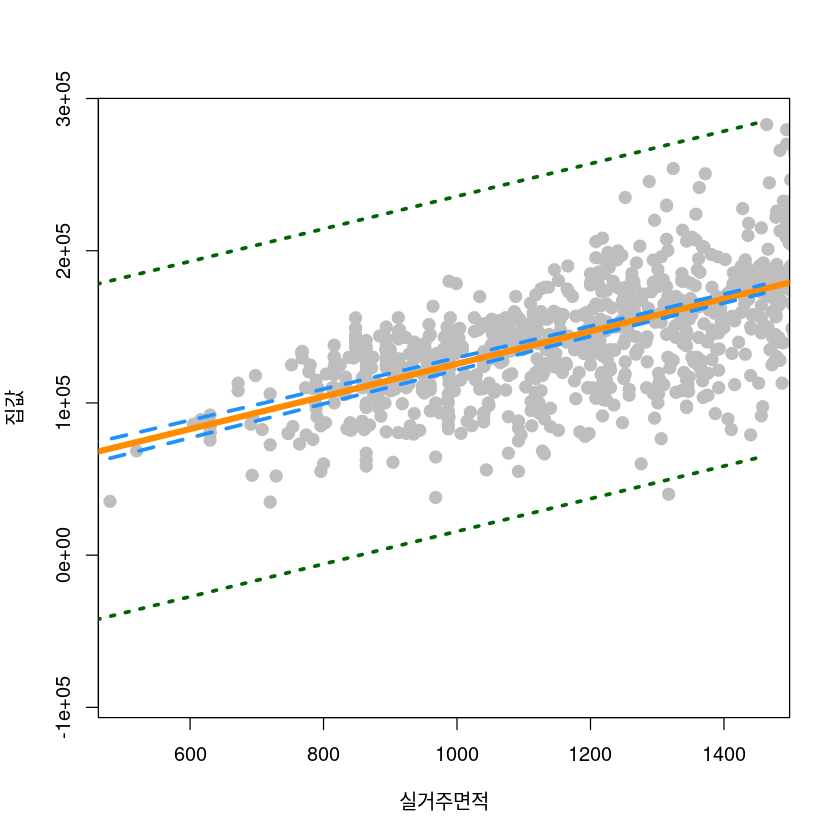

In [284]:
## 신뢰대 
plot(SalePrice~GrLivArea, data = df1,
     xlab = "실거주면적",
     ylab = "집값",
     ylim = c(min(dt_pred$plwr), max(dt_pred$pupr)),
     xlim = c(min(dt_pred$GrLivArea)+500, max(dt_pred$GrLivArea)),
     pch  = 20, # plot character (기호 모양)
     cex  = 2, # size
     col  = "grey"
     )
abline(model1, lwd = 5, col = "darkorange")

lines(dt_pred$GrLivArea, dt_pred$lwr, col = "dodgerblue", lwd = 3, lty = 2)
lines(dt_pred$GrLivArea, dt_pred$upr, col = "dodgerblue", lwd = 3, lty = 2)
lines(dt_pred$GrLivArea, dt_pred$plwr, col = "darkgreen", lwd = 3, lty = 3)
lines(dt_pred$GrLivArea, dt_pred$pupr, col = "darkgreen", lwd = 3, lty = 3)

abline(v=barx, lty=2, lwd=0.2, col='dark grey')

### 잔차분석1

#### 잔차에 대한 산점도

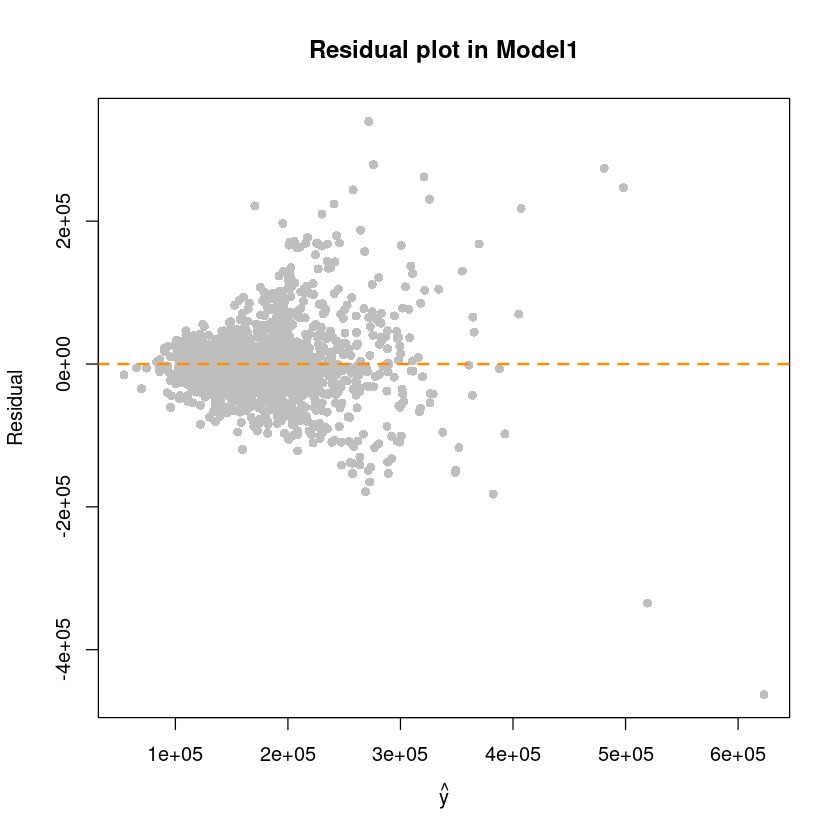

In [285]:
## Model1 residual plot
plot(fitted(model1),resid(model1), col = 'grey', pch=16, 
     xlab = expression(hat(y)),
     ylab = "Residual",
     main = "Residual plot in Model1")
abline(h=0, col='darkorange', lty=2, lwd=2)

#### 등분산 검정

In [290]:
bptest(model1)


	studentized Breusch-Pagan test

data:  model1
BP = 318.13, df = 1, p-value < 2.2e-16


#### 정규성 검정

In [289]:
df1$yhat <- model1$fitted
df1$resid <- model1$residuals

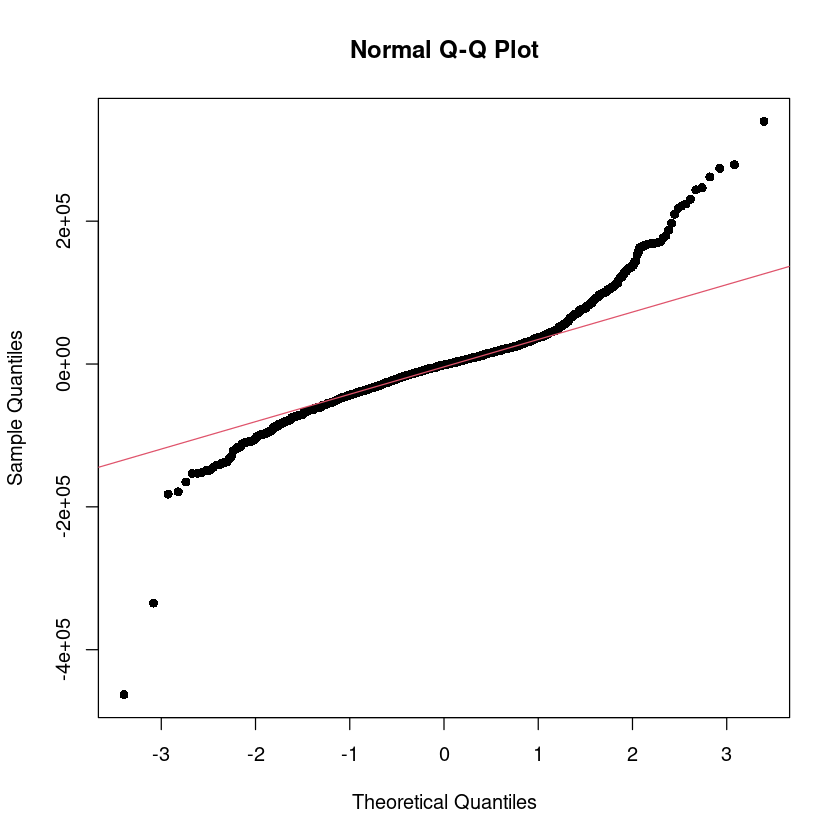

In [291]:
## 잔차의 QQ plot
qqnorm(df1$resid, pch=16)
qqline(df1$resid, col = 2)

In [293]:
## Shapiro-Wilk Test
## H0 : normal distribution  vs. H1 : not H0
shapiro.test(resid(model1))


	Shapiro-Wilk normality test

data:  resid(model1)
W = 0.90957, p-value < 2.2e-16


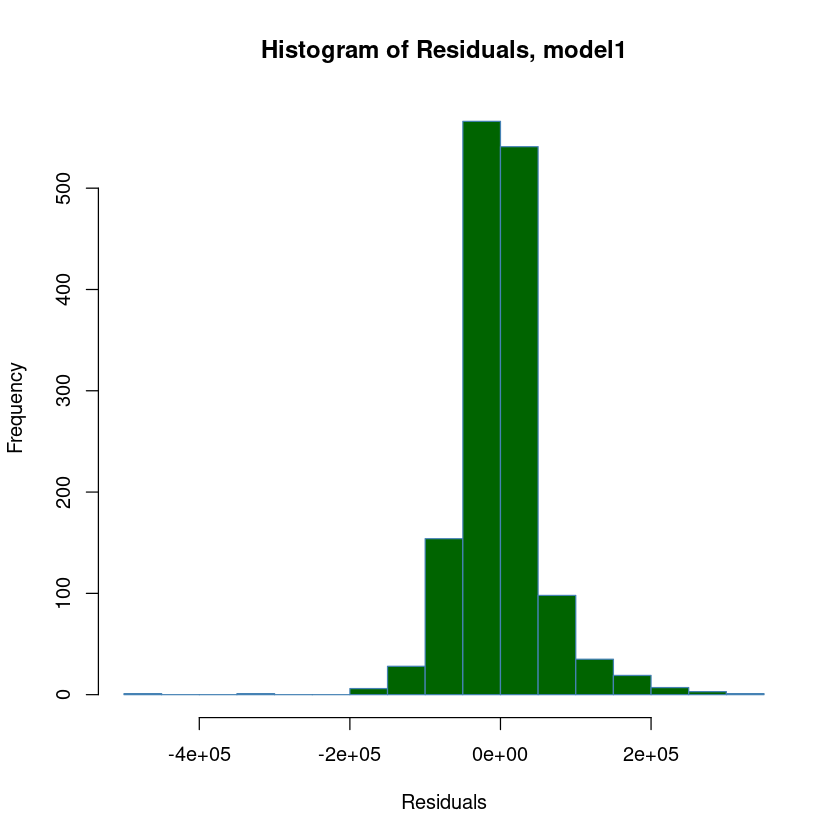

In [294]:
hist(df1$resid,
     xlab = "Residuals",
     main = "Histogram of Residuals, model1",
     col = "darkgreen",
     border = "steelblue")

#### 독립성

In [295]:
# 독립성검정 : DW test
#H0 : uncorrelated vs H1 : rho != 0
dwtest(model1, alternative = "two.sided")  


	Durbin-Watson test

data:  model1
DW = 2.0247, p-value = 0.6374
alternative hypothesis: true autocorrelation is not 0


- 유의수준 $5\%$ 하에서 등분산성, 정규성 가정을 만족하지 않는다. 따라서 위에서 적합한 모델은 사용할 수 없다..

### 적합2: 절편이 없는 회귀모형

$$y = \beta_1x + \epsilon$$

In [188]:
model2 <- lm(SalePrice ~ 0 + GrLivArea, df1)
model2


Call:
lm(formula = SalePrice ~ 0 + GrLivArea, data = df1)

Coefficients:
GrLivArea  
    118.1  


#### 회귀모형의 유의성 검정
> $H_0 : \beta_1 = 0 \text{ vs. } \beta_1 \neq 0$

In [189]:
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
GrLivArea,1,5.235916e+13,5.235916e+13,16470.3,0
Residuals,1459,4.638169e+12,3.179006e+09,NA,NA


#### 회귀계수의 유의성 검정

In [190]:
summary(model2)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
GrLivArea,118.0691,0.9199952,128.3366,0


In [191]:
summary(model2)


Call:
lm(formula = SalePrice ~ 0 + GrLivArea, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-506146  -28044    2922   26479  332542 

Coefficients:
          Estimate Std. Error t value Pr(>|t|)    
GrLivArea   118.07       0.92   128.3   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 56380 on 1459 degrees of freedom
Multiple R-squared:  0.9186,	Adjusted R-squared:  0.9186 
F-statistic: 1.647e+04 on 1 and 1459 DF,  p-value: < 2.2e-16


#### 회귀계수의 신뢰구간

In [253]:
confint(model2, level = 0.95)

,2.5 %,97.5 %
GrLivArea,116.2644,119.8738


#### 평균반응 추정

In [251]:
predict(model2,
        newdata = new_dt,
        interval = c("confidence"), ## 구간추정, confidence option (평균반응)
        level = 0.95) ## 평균반응

,fit,lwr,upr
1,177103.6,174396.7,179810.6


- 실거주면적이  1500sqft 일 때 집값이 평균적으로  177103.6 달러로 추정된다.
- 42평에 한화로 약 2억 3237만원

#### 개별 $y$ 추정

In [252]:
predict(model2,
        newdata = new_dt,
        interval = c("prediction"),  ## prediction option (개별 y)
        level = 0.95) ## 개별 y

,fit,lwr,upr
1,177103.6,66470.77,287736.5


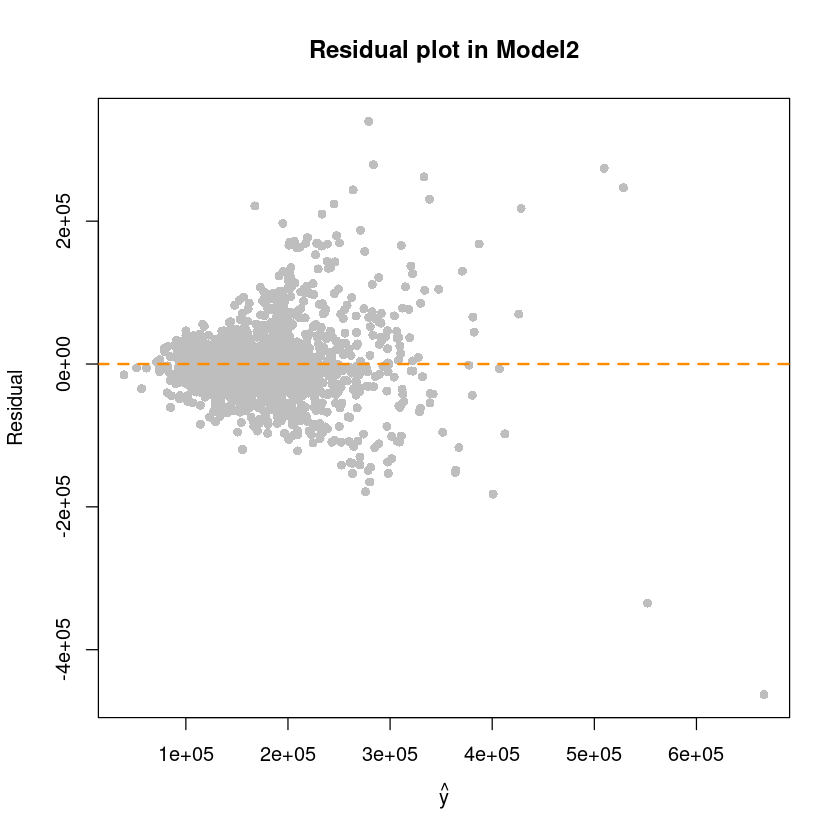

In [296]:
## Model2 residual plot
plot(fitted(model2),resid(model1), col = 'grey', pch=16, 
     xlab = expression(hat(y)),
     ylab = "Residual",
     main = "Residual plot in Model2")
abline(h=0, col='darkorange', lty=2, lwd=2)

- model2의 residual plot을 보면 model1과 유사한 양상을 띈다.
- $\hat{y}$가 커질수록 점점 산포가 증가하는 형태로 등분산성에 위배되는 형태이다.

## 두 회귀모형 비교

In [192]:
df1 %>% colnames()

[1] "SalePrice" "GrLivArea"

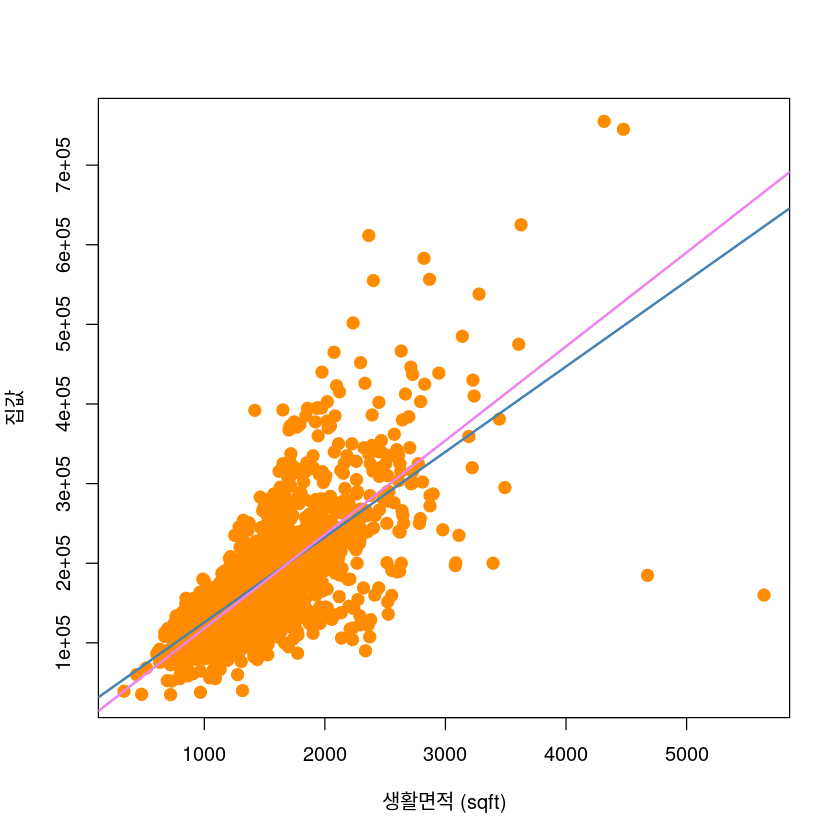

In [193]:
## basic
plot(SalePrice~GrLivArea, data = df1,
     xlab = "생활면적 (sqft)",
     ylab = "집값",
     pch  = 20,
     cex  = 2,
     col  = "darkorange")
     #ylim = c(0,35),
     #xlim = c(0, 12))
abline(model1, col='steelblue', lwd=2) ## model1
abline(model2, col='violet', lwd=2)  ## model2

`geom_smooth()` using formula = 'y ~ x'


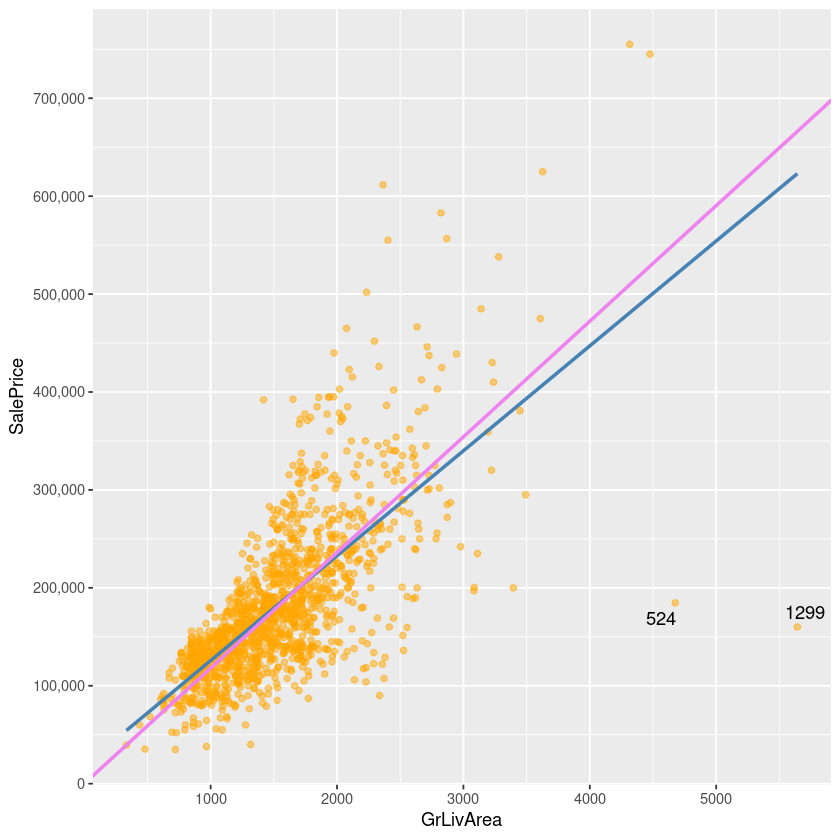

In [208]:
## using ggplot2
g1 <- ggplot(data = df[!is.na(df$SalePrice), ], 
           aes(x = GrLivArea, y = SalePrice)) +
              geom_point(col='orange', alpha=0.5) +
              geom_smooth(method = "lm", se = F, color = "steelblue") + ## model1 (절편O)
              scale_y_continuous(breaks = seq(0, 800000, by=100000), labels = comma) +
              geom_text_repel(aes(label = ifelse(df$GrLivArea[!is.na(df$SalePrice)] > 4500,
                                                 rownames(df), '')))

g1 + geom_abline(intercept = 0, slope = model2$coef, col = 'violet' , lwd = 1) ## model2 (절편X)